# SMS Spam Classifier
Project for E4990 Introduction to Data Science Industry

### Team Members:
Jason Lei and Andres Soto

### Roles:
Machine Learning, Natural Language Processing, Web Development

### Dataset:
https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection

### Project Description and Motivation
While reading about available open-source datasets, we discovered the SMS Spam Dataset, which contains text messages labeled as ham (legitimate) and spam. SMS spam is an increasingly relevant problem as the use of mobile devices continues to rise. SMS spam, however, is not just a nuisance--it can have immediate financial consequences for its recipients, as many mobile phone users are charged based on how many texts they receive. Furthermore, SMS spam is also commonly involved with phishing schemes that lure users into clicking on potentially malicious links. Thus, the detection of SMS spam is important to help ensure user privacy and financial security for an always-rising number of people. 

### Audience
Anyone with a mobile device that receives SMS messages. Telecommunications companies trying to reduce the amount of spam their customers receive. Cyber security companies. 

### Algorithms
Naive Bayes, K Nearest Neighbor, SVM, Adaboost, Tree-based classifier 

At the bottom of the notebook is a sample model based on word frequency. We will also be trying an NLP-based approach using LIWC (Linguistic Inquiry Word Count) analysis. This will allow us to see if the psychological meaning of words, as well as intent, can help us better predict spam messages better than sheer word frequency.

### Interface
Our initial interface is to provide a web application where users can copy-paste text in and receive a prediction of whether the text message is spam or ham, along with a confidence estimate. Given that neither of us is very experienced with web development, we imagine that getting this simple interface could be potentially challening. Additional features we'd like to implement include outputting a word cloud indicating which parts of the text most strongly weigh the message towards being spam or ham. See below for an example word cloud:

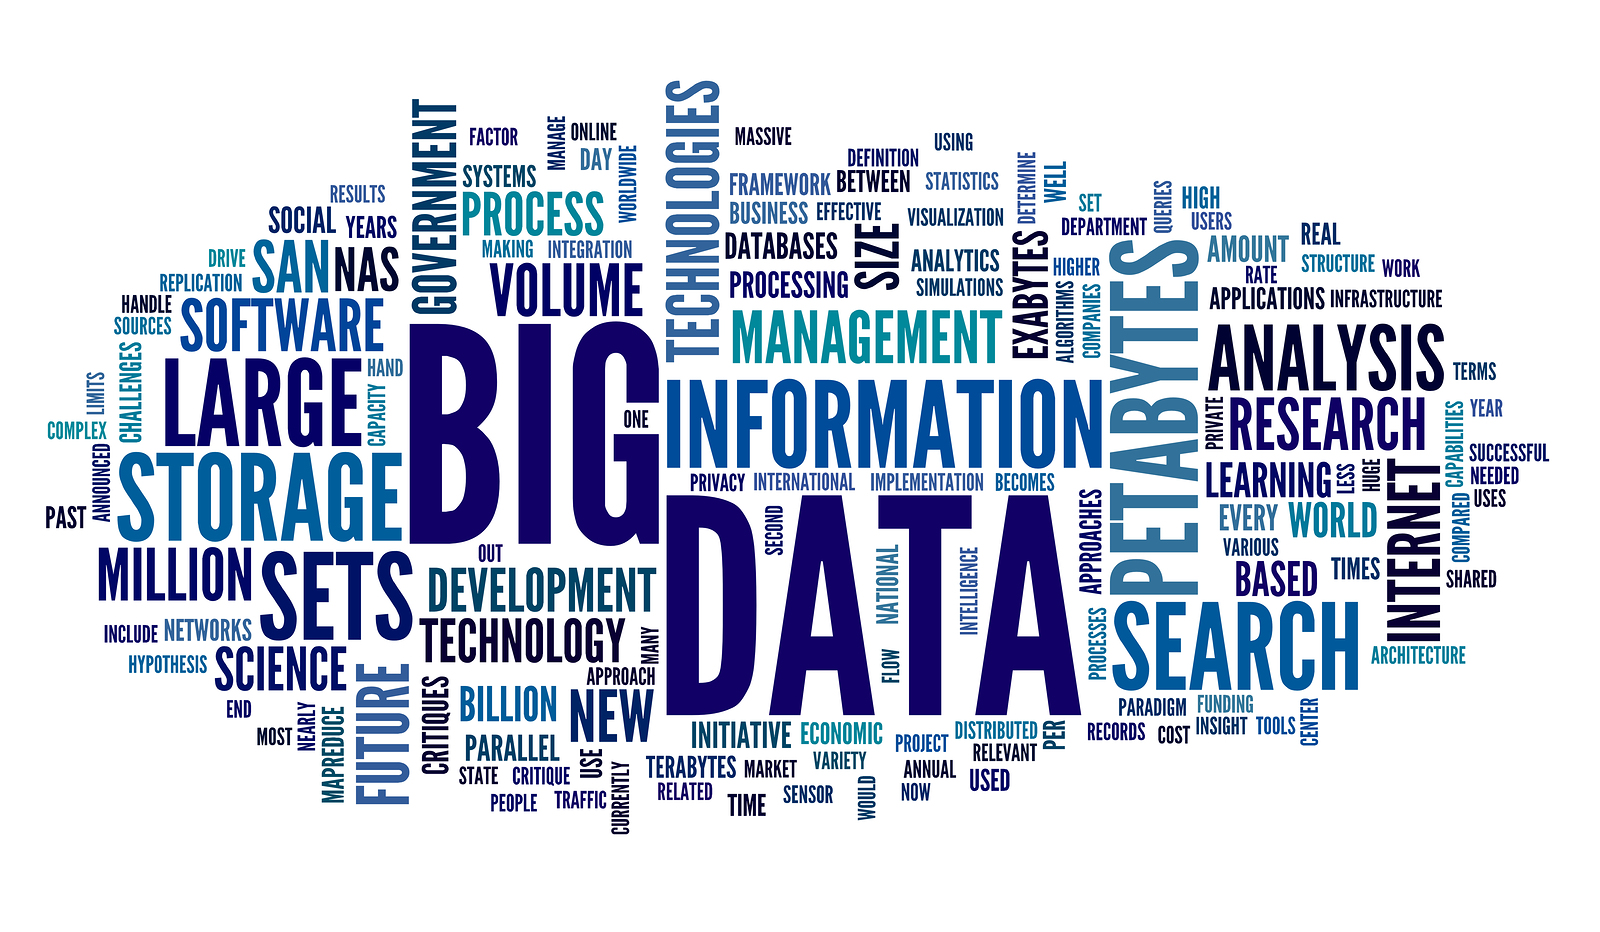

In [1]:
from IPython.display import Image
Image('word-cloud.jpg')

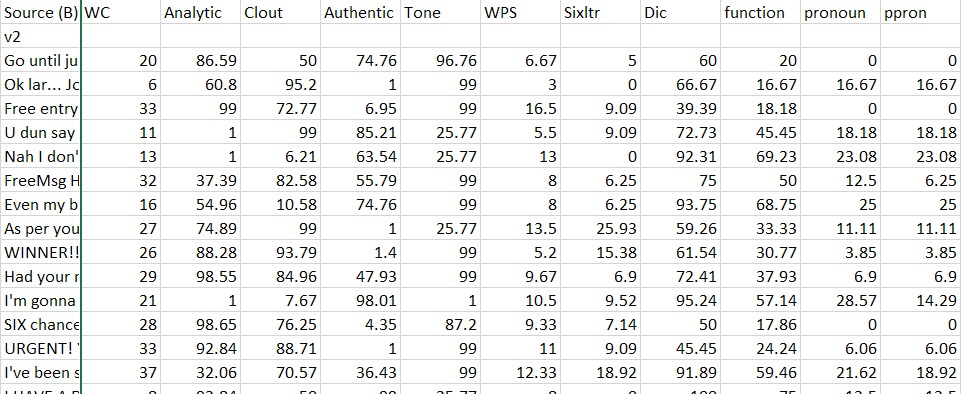

In [2]:
Image('LIWC.jpg')

### Potential Expansions of Project
Given time, we would also like to expand our spam classification domain from SMS messages to email as well. We seek to create our own spam dataset consisting of our own scraped emails and the emails of a fake email account that we will sign up to receive a lot of spam. The final goal of this project would be to build an application that would allow users to authenticate into their email accounts (probably Gmail) and then provide a spam analysis of their inbox, as well as a breakdown of the topics that constitute their spam. 

In [3]:
import pandas as pd
df = pd.read_csv('spam.csv', encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
from sklearn import cross_validation
data_train, data_test, labels_train, labels_test = cross_validation.train_test_split(
    df.v2,
    df.v1, 
    test_size=0.1, 
    random_state=42)

data_train.head()

C:\Users\Jason\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


3130    LookAtMe!: Thanks for your purchase of a video...
106           Aight, I'll hit you up when I get some cash
4697                           Don no da:)whats you plan?
856                         Going to take your babe out ?
3454    No need lar. Jus testing e phone card. Dunno n...
Name: v2, dtype: object

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectPercentile, f_classif

vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5)
data_train_transformed = vectorizer.fit_transform(data_train)
data_test_transformed  = vectorizer.transform(data_test)

selector = SelectPercentile(f_classif, percentile=10)
selector.fit(data_train_transformed, labels_train)
data_train_transformed = selector.transform(data_train_transformed).toarray()
data_test_transformed  = selector.transform(data_test_transformed).toarray()

print(data_train_transformed[:10])

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [7]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

clf = GaussianNB()
clf.fit(data_train_transformed, labels_train)
predictions = clf.predict(data_test_transformed)

In [8]:
predictions

array(['ham', 'ham', 'spam', 'ham', 'spam', 'ham', 'ham', 'ham', 'spam',
       'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham',
       'ham', 'spam', 'ham', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'spam', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham',
       'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham',
       'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham',
   